<a href="https://colab.research.google.com/github/muneeb706/machine-learning/blob/main/regularization_svm_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 !pip install -U liblinear-official

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for liblinear-official: filename=liblinear_official-2.43.0-cp37-cp37m-linux_x86_64.whl size=124242 sha256=fe1bfca9f2a8b9e6c2575cd927a50eac15f278985e197353c023ec0860ef2dd6
  Stored in directory: /root/.cache/pip/wheels/f8/66/25/ae78a3b8319bbc49d770ada1ba02fc1274b93dce2e5b1c8b61
Successfully built liblinear-official


In [7]:
 !pip install -U libsvm

     |████████████████████████████████| 174kB 5.6MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233325 sha256=feae055b4ad852b200c91bb5c4305f4b61af1b485d92e201a4484f7fcebccee4
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


I will use Python Interface for following questions.

In [8]:
import os
import sys

import numpy as np
import pandas as pd

from liblinear.liblinearutil import *

## Problem 1: Regularized Logistic Regression

### Part - 2: Train and test a regularized logistic regression model one two data sets, namely the breast cancer and sonar data sets which are available here https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#breast-cancer and here https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#sonar. We will use the scaled version for our experiment.  A copy of them is also enclosed in this homework. Use the provided train-ing/testing splitting. In particular, the file \xxx-scale-test-indices.txt" contains the indices of examples in the original file for training, and \xxx-scale-test-indices.txt" contains the indices of examples in the original file for testing.

### 1) Working with Breast Cancer Dataset.

Reading data in LIBSVM format.

In [ ]:
 y_breast, x_breast = svm_read_problem('./sample_data/breast-cancer_scale.txt')

Reading training and testing indexes.

In [ ]:
with open('./sample_data/breast-cancer-scale-train-indices.txt') as f:    
    breast_train_indexes = [int(line) for line in f]
with open('./sample_data/breast-cancer-scale-test-indices.txt') as f:    
    breast_test_indexes = [int(line) for line in f]

Splitting training and testing data.

In [ ]:
x_breast_train = [x_breast[i - 1] for i in breast_train_indexes]
y_breast_train = [y_breast[i - 1] for i in breast_train_indexes]

In [ ]:
x_breast_test = [x_breast[i - 1] for i in breast_test_indexes]
y_breast_test = [y_breast[i - 1] for i in breast_test_indexes]

Using the 5-fold cross validation method to decide the best value of the parameter C. The candidate values for C are 0.1, 1, 10, 100, 1000. For each C, report the training error and
validation error. Choosing the best C that yields the lowest validation error.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 0 -v 5 -c ' + C
  CV_ACC = train(y_breast_train, x_breast_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = predict(y_breast_train, x_breast_train, train(y_breast_train, x_breast_train, '-s 0 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)


For C = 0.1
Cross Validation Accuracy = 95.4%
Validation Error: 4.6000000000000085
Accuracy = 95.8% (479/500) (classification)
Training Error: 4.200000000000003

For C = 1
Cross Validation Accuracy = 97%
Validation Error: 3.0
Accuracy = 97.2% (486/500) (classification)
Training Error: 2.799999999999997

For C = 10
Cross Validation Accuracy = 97%
Validation Error: 3.0
Accuracy = 97.6% (488/500) (classification)
Training Error: 2.4000000000000057

For C = 100
Cross Validation Accuracy = 97.4%
Validation Error: 2.6000000000000085
Accuracy = 97.8% (489/500) (classification)
Training Error: 2.200000000000003

For C = 1000
Cross Validation Accuracy = 96.8%
Validation Error: 3.200000000000003
Accuracy = 97.8% (489/500) (classification)
Training Error: 2.200000000000003

Best C = 100


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = problem(y_breast_train, x_breast_train)
param = parameter('-s 0 -c ' + min_val_error_C)
m = train(prob, param)

# predicting

print("Logistic Regression (Breast Cancer): ")
p_label, p_acc, p_val = predict(y_breast_test, x_breast_test, m)
ACC, MSE, SCC = evaluations(y_breast_test, p_label)
lr_breast_error_rate = 100 - ACC
print("Test Error Rate = " + str(lr_breast_error_rate))



Logistic Regression (Breast Cancer): 
Accuracy = 96.1749% (176/183) (classification)
Test Error Rate = 3.825136612021865


### 2) Working with Sonar Dataset.

Reading data in LIBSVM format.

In [ ]:
 y_sonar, x_sonar = svm_read_problem('./sample_data/sonar_scale.txt')

Reading training and testing indexes.

In [ ]:
with open('./sample_data/sonar-scale-train-indices.txt') as f:    
    sonar_train_indexes = [int(line) for line in f]
with open('./sample_data/sonar-scale-test-indices.txt') as f:    
    sonar_test_indexes = [int(line) for line in f]

Splitting training and testing data.

In [ ]:
x_sonar_train = [x_sonar[i - 1] for i in sonar_train_indexes]
y_sonar_train = [y_sonar[i - 1] for i in sonar_train_indexes]
x_sonar_test = [x_sonar[i - 1] for i in sonar_test_indexes]
y_sonar_test = [y_sonar[i - 1] for i in sonar_test_indexes]

Using the 5-fold cross validation method to decide the best value of the parameter C. The candidate values for C are 0.1, 1, 10, 100, 1000. For each C, report the training error and
validation error. Choosing the best C that yields the lowest validation error.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 0 -v 5 -c ' + C
  CV_ACC = train(y_sonar_train, x_sonar_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = predict(y_sonar_train, x_sonar_train, train(y_sonar_train, x_sonar_train, '-s 0 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)

For C = 0.1
Cross Validation Accuracy = 76%
Validation Error: 24.0
Accuracy = 81.3333% (122/150) (classification)
Training Error: 18.66666666666667

For C = 1
Cross Validation Accuracy = 72.6667%
Validation Error: 27.33333333333333
Accuracy = 89.3333% (134/150) (classification)
Training Error: 10.666666666666671

For C = 10
Cross Validation Accuracy = 76.6667%
Validation Error: 23.33333333333333
Accuracy = 94.6667% (142/150) (classification)
Training Error: 5.333333333333329

For C = 100
Cross Validation Accuracy = 74.6667%
Validation Error: 25.33333333333333
Accuracy = 98% (147/150) (classification)
Training Error: 2.0

For C = 1000
Cross Validation Accuracy = 72.6667%
Validation Error: 27.33333333333333
Accuracy = 100% (150/150) (classification)
Training Error: 0.0

Best C = 10


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = problem(y_sonar_train, x_sonar_train)
param = parameter('-s 0 -c ' + min_val_error_C)
m = train(prob, param)

# predicting

print("Logistic Regression (Sonar Dataset): ")
p_label, p_acc, p_val = predict(y_sonar_test, x_sonar_test, m)
ACC, MSE, SCC = evaluations(y_sonar_test, p_label)
lr_sonar_error_rate = 100 - ACC
print("Test Error Rate = " + str(lr_sonar_error_rate))

Logistic Regression (Sonar Dataset): 
Accuracy = 72.4138% (42/58) (classification)
Test Error Rate = 27.58620689655173


## Problem 2: Support Vector Machine

### Part - 1: Repeating the same experiments as in Problem 1 by using linear SVM. To train a linear SVM by liblinear you can use the option "-s 3"

### 1) Working with Breast Cancer Dataset.

Using the 5-fold cross validation method to decide the best value of the parameter C. The candidate values for C are 0.1, 1, 10, 100, 1000. For each C, report the training error and
validation error. Choosing the best C that yields the lowest validation error.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 3 -v 5 -c ' + C
  CV_ACC = train(y_breast_train, x_breast_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = predict(y_breast_train, x_breast_train, train(y_breast_train, x_breast_train, '-s 3 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)


For C = 0.1
Cross Validation Accuracy = 96.8%
Validation Error: 3.200000000000003
Accuracy = 97% (485/500) (classification)
Training Error: 3.0

For C = 1
Cross Validation Accuracy = 97%
Validation Error: 3.0
Accuracy = 97.8% (489/500) (classification)
Training Error: 2.200000000000003

For C = 10
Cross Validation Accuracy = 97.2%
Validation Error: 2.799999999999997
Accuracy = 98% (490/500) (classification)
Training Error: 2.0

For C = 100
Cross Validation Accuracy = 93.6%
Validation Error: 6.3999999999999915
Accuracy = 97.4% (487/500) (classification)
Training Error: 2.6000000000000085

For C = 1000
Cross Validation Accuracy = 91.6%
Validation Error: 8.399999999999991
Accuracy = 96.8% (484/500) (classification)
Training Error: 3.200000000000003

Best C = 10


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = problem(y_breast_train, x_breast_train)
param = parameter('-s 3 -c ' + min_val_error_C)
m = train(prob, param)

# predicting

print("Linear SVM (Breast Dataset): ")

p_label, p_acc, p_val = predict(y_breast_test, x_breast_test, m)
ACC, MSE, SCC = evaluations(y_breast_test, p_label)
lsvm_breast_error_rate = 100 - ACC
print("Test Error Rate = " + str(lsvm_breast_error_rate))

Linear SVM (Breast Dataset): 
Accuracy = 96.7213% (177/183) (classification)
Test Error Rate = 3.278688524590166


### 2) Working with Sonar Dataset.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 3 -v 5 -c ' + C
  CV_ACC = train(y_sonar_train, x_sonar_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = predict(y_sonar_train, x_sonar_train, train(y_sonar_train, x_sonar_train, '-s 3 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)

For C = 0.1
Cross Validation Accuracy = 70%
Validation Error: 30.0
Accuracy = 84% (126/150) (classification)
Training Error: 16.0

For C = 1
Cross Validation Accuracy = 69.3333%
Validation Error: 30.666666666666657
Accuracy = 92.6667% (139/150) (classification)
Training Error: 7.333333333333343

For C = 10
Cross Validation Accuracy = 68.6667%
Validation Error: 31.33333333333333
Accuracy = 96% (144/150) (classification)
Training Error: 4.0

For C = 100
Cross Validation Accuracy = 71.3333%
Validation Error: 28.666666666666657
Accuracy = 96% (144/150) (classification)
Training Error: 4.0

For C = 1000
Cross Validation Accuracy = 67.3333%
Validation Error: 32.66666666666667
Accuracy = 95.3333% (143/150) (classification)
Training Error: 4.666666666666657

Best C = 100


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = problem(y_sonar_train, x_sonar_train)
param = parameter('-s 3 -c ' + min_val_error_C)
m = train(prob, param)

# predicting
print("Linear SVM (Sonar Dataset): ")

p_label, p_acc, p_val = predict(y_sonar_test, x_sonar_test, m)
ACC, MSE, SCC = evaluations(y_sonar_test, p_label)
lsvm_sonar_error_rate = 100 - ACC
print("Test Error Rate = " + str(lsvm_sonar_error_rate))

Linear SVM (Sonar Dataset): 
Accuracy = 70.6897% (41/58) (classification)
Test Error Rate = 29.310344827586206


### Part - 2: Repeat the same experiments as in Problem 1 by using kernel SVM. To train a kernel SVM by libsvm you can use the option "-s 0". Use the optional "-t " to choose different types of kernels. Try polynomial kernel and RBF kernel with default values of parameters.

In [ ]:
from libsvm.svmutil import *

### 1) Working with Breast Cancer Dataset.

Using the 5-fold cross validation method to decide the best value of the parameter C. The candidate values for C are 0.1, 1, 10, 100, 1000. For each C, report the training error and
validation error. Choosing the best C that yields the lowest validation error.

#### Polynomial Kernel.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 0 -t 1 -v 5 -c ' + C
  CV_ACC = svm_train(y_breast_train, x_breast_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = svm_predict(y_breast_train, x_breast_train, svm_train(y_breast_train, x_breast_train, '-s 0 -t 1 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)


For C = 0.1
Cross Validation Accuracy = 97.4%
Validation Error: 2.6000000000000085
Accuracy = 97.8% (489/500) (classification)
Training Error: 2.200000000000003

For C = 1
Cross Validation Accuracy = 97.6%
Validation Error: 2.4000000000000057
Accuracy = 97.8% (489/500) (classification)
Training Error: 2.200000000000003

For C = 10
Cross Validation Accuracy = 97.2%
Validation Error: 2.799999999999997
Accuracy = 98.6% (493/500) (classification)
Training Error: 1.4000000000000057

For C = 100
Cross Validation Accuracy = 95.6%
Validation Error: 4.400000000000006
Accuracy = 99.2% (496/500) (classification)
Training Error: 0.7999999999999972

For C = 1000
Cross Validation Accuracy = 95.2%
Validation Error: 4.800000000000011
Accuracy = 100% (500/500) (classification)
Training Error: 0.0

Best C = 1


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = svm_problem(y_breast_train, x_breast_train)
param = svm_parameter('-s 0 -t 1 -c ' + min_val_error_C)
m = svm_train(prob, param)

# predicting

print("Polynomial Kernel SVM (Breast Dataset): ")

p_label, p_acc, p_val = svm_predict(y_breast_test, x_breast_test, m)
ACC, MSE, SCC = evaluations(y_breast_test, p_label)
pksvm_breast_error_rate = 100 - ACC
print("Test Error Rate = " + str(pksvm_breast_error_rate))



Polynomial Kernel SVM (Breast Dataset): 
Accuracy = 96.7213% (177/183) (classification)
Test Error Rate = 3.278688524590166


#### RBF Kernel.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 0 -t 2 -v 5 -c ' + C
  CV_ACC = svm_train(y_breast_train, x_breast_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = svm_predict(y_breast_train, x_breast_train, svm_train(y_breast_train, x_breast_train, '-s 0 -t 2 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)


For C = 0.1
Cross Validation Accuracy = 97%
Validation Error: 3.0
Accuracy = 97.4% (487/500) (classification)
Training Error: 2.6000000000000085

For C = 1
Cross Validation Accuracy = 97.8%
Validation Error: 2.200000000000003
Accuracy = 97.8% (489/500) (classification)
Training Error: 2.200000000000003

For C = 10
Cross Validation Accuracy = 97.2%
Validation Error: 2.799999999999997
Accuracy = 98.4% (492/500) (classification)
Training Error: 1.5999999999999943

For C = 100
Cross Validation Accuracy = 96.2%
Validation Error: 3.799999999999997
Accuracy = 99.6% (498/500) (classification)
Training Error: 0.4000000000000057

For C = 1000
Cross Validation Accuracy = 95.2%
Validation Error: 4.800000000000011
Accuracy = 100% (500/500) (classification)
Training Error: 0.0

Best C = 1


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = svm_problem(y_breast_train, x_breast_train)
param = svm_parameter('-s 0 -t 2 -c ' + min_val_error_C)
m = svm_train(prob, param)

# predicting

print("RBF Kernel SVM (Breast Dataset): ")

p_label, p_acc, p_val = svm_predict(y_breast_test, x_breast_test, m)
ACC, MSE, SCC = evaluations(y_breast_test, p_label)
rbfksvm_breast_error_rate = 100 - ACC
print("Test Error Rate = " + str(rbfksvm_breast_error_rate))



RBF Kernel SVM (Breast Dataset): 
Accuracy = 96.1749% (176/183) (classification)
Test Error Rate = 3.825136612021865


### 2) Working with Sonar Dataset.

#### Polynomial Kernel.

Using the 5-fold cross validation method to decide the best value of the parameter C. The candidate values for C are 0.1, 1, 10, 100, 1000. For each C, report the training error and
validation error. Choosing the best C that yields the lowest validation error.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 0 -t 1 -v 5 -c ' + C
  CV_ACC = svm_train(y_sonar_train, x_sonar_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = svm_predict(y_sonar_train, x_sonar_train, svm_train(y_sonar_train, x_sonar_train, '-s 0 -t 1 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)

For C = 0.1
Cross Validation Accuracy = 56%
Validation Error: 43.99999999999999
Accuracy = 56% (84/150) (classification)
Training Error: 43.99999999999999

For C = 1
Cross Validation Accuracy = 56%
Validation Error: 43.99999999999999
Accuracy = 60% (90/150) (classification)
Training Error: 40.0

For C = 10
Cross Validation Accuracy = 78.6667%
Validation Error: 21.333333333333343
Accuracy = 84% (126/150) (classification)
Training Error: 16.0

For C = 100
Cross Validation Accuracy = 84.6667%
Validation Error: 15.333333333333329
Accuracy = 100% (150/150) (classification)
Training Error: 0.0

For C = 1000
Cross Validation Accuracy = 86%
Validation Error: 14.0
Accuracy = 100% (150/150) (classification)
Training Error: 0.0

Best C = 1000


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = svm_problem(y_sonar_train, x_sonar_train)
param = svm_parameter('-s 0 -t 1 -c ' + min_val_error_C)
m = svm_train(prob, param)

# predicting

print("Polynomial Kernel SVM (Sonar Dataset): ")

p_label, p_acc, p_val = svm_predict(y_sonar_test, x_sonar_test, m)
ACC, MSE, SCC = evaluations(y_sonar_test, p_label)
pk_sonar_error_rate = 100 - ACC
print("Test Error Rate = " + str(pk_sonar_error_rate))

Polynomial Kernel SVM (Sonar Dataset): 
Accuracy = 86.2069% (50/58) (classification)
Test Error Rate = 13.793103448275872


#### RBF Kernel.

Using the 5-fold cross validation method to decide the best value of the parameter C. The candidate values for C are 0.1, 1, 10, 100, 1000. For each C, report the training error and
validation error. Choosing the best C that yields the lowest validation error.

In [ ]:
candidate_C = ['0.1', '1', '10', '100', '1000']
min_val_error = 100
min_val_error_C = candidate_C[0]
for C in candidate_C:
  print("For C = " + C)
  parameters = '-s 0 -t 2 -v 5 -c ' + C
  CV_ACC = svm_train(y_sonar_train, x_sonar_train, parameters)
  val_error = 100 - CV_ACC
  print("Validation Error: " + str(val_error))
  p_label, p_acc, p_val = svm_predict(y_sonar_train, x_sonar_train, svm_train(y_sonar_train, x_sonar_train, '-s 0 -t 2 -c ' + C))
  print("Training Error: " + str(100 - p_acc[0]))

  if val_error < min_val_error:
    min_val_error = val_error
    min_val_error_C = C
  print("")


print("Best C = " + min_val_error_C)

For C = 0.1
Cross Validation Accuracy = 56%
Validation Error: 43.99999999999999
Accuracy = 56% (84/150) (classification)
Training Error: 43.99999999999999

For C = 1
Cross Validation Accuracy = 74.6667%
Validation Error: 25.33333333333333
Accuracy = 85.3333% (128/150) (classification)
Training Error: 14.666666666666657

For C = 10
Cross Validation Accuracy = 72.6667%
Validation Error: 27.33333333333333
Accuracy = 97.3333% (146/150) (classification)
Training Error: 2.666666666666657

For C = 100
Cross Validation Accuracy = 82.6667%
Validation Error: 17.33333333333333
Accuracy = 100% (150/150) (classification)
Training Error: 0.0

For C = 1000
Cross Validation Accuracy = 81.3333%
Validation Error: 18.66666666666667
Accuracy = 100% (150/150) (classification)
Training Error: 0.0

Best C = 100


Using the selected best C value to train a logistic regression model on the whole training data and evaluating and reporting its performance (by error rate) on the testing data.

In [ ]:
# training model
prob  = svm_problem(y_sonar_train, x_sonar_train)
param = svm_parameter('-s 0 -t 2 -c ' + min_val_error_C)
m = svm_train(prob, param)

# predicting

print("RBF Kernel SVM (Sonar Dataset): ")

p_label, p_acc, p_val = svm_predict(y_sonar_test, x_sonar_test, m)
ACC, MSE, SCC = evaluations(y_sonar_test, p_label)
rbfksvm_sonar_error_rate = 100 - ACC
print("Test Error Rate = " + str(pk_sonar_error_rate))

RBF Kernel SVM (Sonar Dataset): 
Accuracy = 86.2069% (50/58) (classification)
Test Error Rate = 13.793103448275872


### Part - 3: Compare the test error given by Logistic Regression, Linear SVM and Kernel SVMs.

In [ ]:
print("--- Breast Dataset Error Rates ---")
print("Logistic Regression: " + str(lr_breast_error_rate))
print("Linear SVM: " + str(lsvm_breast_error_rate))
print("Polynomial Kernel SVM: " + str(pksvm_breast_error_rate))
print("RBF Kernel SVM: " + str(rbfksvm_breast_error_rate))
print("")
print("--- Sonar Dataset Error Rates ---")
print("Logistic Regression: " + str(lr_sonar_error_rate))
print("Linear SVM: " + str(lsvm_sonar_error_rate))
print("Polynomial Kernel SVM: " + str(pk_sonar_error_rate))
print("RBF Kernel SVM: " + str(rbfksvm_sonar_error_rate))


--- Breast Dataset Error Rates ---
Logistic Regression: 3.825136612021865
Linear SVM: 3.278688524590166
Polynomial Kernel SVM: 3.278688524590166
RBF Kernel SVM: 3.825136612021865

--- Sonar Dataset Error Rates ---
Logistic Regression: 27.58620689655173
Linear SVM: 29.310344827586206
Polynomial Kernel SVM: 13.793103448275872
RBF Kernel SVM: 13.793103448275872


In case of Breast Dataset, the error rates reported by all of the algorithms are similar. The difference between the error rates is not significant enough. This results suggest that data points in Breast Dataset are linearly separable. However, in case of Sonar Dataset, the performance of non-lienar SVMs are way better than the performance of Linear algorithms (Linear SVM and Logistic Regression). The error rates reported by non-linear SVMs are less than half of the error rates reported by linear algorithms. This shows the data points in Sonar Dataset are not linearly separable. Also, the error rates reported by Polynomial and Kernel SVM are very similar. 

## Problem 3: Data Processing

### Part - 1: data preprocessing, training, and evaluation

Reading data file.

In [17]:
covtype_data = pd.read_csv('./sample_data/covtype.data', sep=",", header=None)
covtype_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Separting target feature

In [18]:
covtype_X, covtype_Y = covtype_data.iloc[:, 0:54], covtype_data.iloc[:, 54]

#### Data Preprocessing

In [19]:
from sklearn import preprocessing

##### 1) Rescaling (min-max)

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
covtype_X_rescaled = pd.DataFrame(min_max_scaler.fit_transform(covtype_X))
covtype_X_rescaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 2) Standardization

In [21]:
scaler = preprocessing.StandardScaler().fit(covtype_X)
covtype_X_standardized = pd.DataFrame(scaler.transform(covtype_X))
covtype_X_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010336,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010336,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,4.287867,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,4.272931,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010336,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654


##### 3) Normalization

In [22]:
normalizer = preprocessing.Normalizer().fit(covtype_X)
covtype_X_normalized = pd.DataFrame(normalizer.transform(covtype_X))
covtype_X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.380210,0.007469,0.000439,0.037787,0.000000,0.074695,0.032368,0.033979,0.021676,0.919622,0.000146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000146,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382769,0.008276,0.000296,0.031331,-0.000887,0.057637,0.032513,0.034730,0.022316,0.919975,0.000148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000148,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.375821,0.018630,0.001206,0.035920,0.008712,0.426216,0.031363,0.031899,0.018094,0.820399,0.000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.371810,0.020693,0.002403,0.032308,0.015754,0.412529,0.031774,0.031774,0.016288,0.829196,0.000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.386275,0.006698,0.000298,0.022775,-0.000149,0.058202,0.032748,0.034832,0.022328,0.918725,0.000149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000149,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Preprocessing target variable, keeping 2 as positive class and for others assigning value of 0 for representing negative class.

In [23]:
covtype_Y = covtype_Y.apply(lambda x: 2 if (x == 2)  else 0)
covtype_Y.head()

0    0
1    0
2    2
3    2
4    0
Name: 54, dtype: int64

Converting data to libsvm format.

In [24]:
from sklearn.datasets import dump_svmlight_file

### Dumping Raw Data ###
dump_svmlight_file(covtype_X.values, list(covtype_Y),'./sample_data/covtype_libsvm.data', zero_based=True, multilabel=False)
### Dumping Rescaled Data ###
dump_svmlight_file(covtype_X_rescaled.values,list(covtype_Y),'./sample_data/covtype_rescaled_libsvm.data', zero_based=True, multilabel=False)
### Dumping Standardized Data ###
dump_svmlight_file(covtype_X_standardized.values,list(covtype_Y),'./sample_data/covtype_standardized_libsvm.data', zero_based=True, multilabel=False)
### Dumping Normalized Data ###
dump_svmlight_file(covtype_X_normalized.values,list(covtype_Y),'./sample_data/covtype_normalized_libsvm.data', zero_based=True, multilabel=False)

Reading data in libsvm format.

In [25]:
 ### Reading Raw Data ###
 y_covtype, x_covtype = svm_read_problem('./sample_data/covtype_libsvm.data')
 ### Reading Rescaled Data ###
 y_covtype_rescaled, x_covtype_rescaled = svm_read_problem('./sample_data/covtype_rescaled_libsvm.data')
### Reading Standardized Data ###
 y_covtype_standardized, x_covtype_standardized = svm_read_problem('./sample_data/covtype_standardized_libsvm.data')
### Reading Normalized Data ###
 y_covtype_normalized, x_covtype_normalized = svm_read_problem('./sample_data/covtype_normalized_libsvm.data')

Reading training and testing indexes.

In [29]:
with open('./sample_data/covtype.train.index.txt') as f:    
    covtype_train_indexes = [int(line) for line in f]
with open('./sample_data/covtype.test.index.txt') as f:    
    covtype_test_indexes = [int(line) for line in f]

Splitting training and testing data.

In [30]:
### Splitting Raw Data ###
x_covtype_train = [x_covtype[i - 1] for i in covtype_train_indexes]
y_covtype_train = [y_covtype[i - 1] for i in covtype_train_indexes]
x_covtype_test = [x_covtype[i - 1] for i in covtype_test_indexes]
y_covtype_test = [y_covtype[i - 1] for i in covtype_test_indexes]

### Splitting Rescaled Data ###
x_covtype_rescaled_train = [x_covtype_rescaled[i - 1] for i in covtype_train_indexes]
y_covtype_rescaled_train = [y_covtype_rescaled[i - 1] for i in covtype_train_indexes]
x_covtype_rescaled_test = [x_covtype_rescaled[i - 1] for i in covtype_test_indexes]
y_covtype_rescaled_test = [y_covtype_rescaled[i - 1] for i in covtype_test_indexes]

### Splitting Standardized Data ###
x_covtype_standardized_train = [x_covtype_standardized[i - 1] for i in covtype_train_indexes]
y_covtype_standardized_train = [y_covtype_standardized[i - 1] for i in covtype_train_indexes]
x_covtype_standardized_test = [x_covtype_standardized[i - 1] for i in covtype_test_indexes]
y_covtype_standardized_test = [y_covtype_standardized[i - 1] for i in covtype_test_indexes]

### Splitting Normalized Data ###
x_covtype_normalized_train = [x_covtype_normalized[i - 1] for i in covtype_train_indexes]
y_covtype_normalized_train = [y_covtype_normalized[i - 1] for i in covtype_train_indexes]
x_covtype_normalized_test = [x_covtype_normalized[i - 1] for i in covtype_test_indexes]
y_covtype_normalized_test = [y_covtype_normalized[i - 1] for i in covtype_test_indexes]


##### Training and Evaluation.

Defining utility functions.

In [ ]:
# function to get best value of C using 5-fold cross validation
def getBestC(x_train, y_train):
  candidate_C = ['0.1', '1', '10', '100', '1000']
  min_val_error = 100
  min_val_error_C = candidate_C[0]
  for C in candidate_C:
    print("For C = " + C)
    parameters = '-s 3 -v 5 -c ' + C
    CV_ACC = train(y_train, x_train, parameters)
    val_error = 100 - CV_ACC
    print("Validation Error: " + str(val_error))
    p_label, p_acc, p_val = predict(y_train, x_train, train(y_train, x_train, '-s 3 -c ' + C))
    print("Training Error: " + str(100 - p_acc[0]))

    if val_error < min_val_error:
      min_val_error = val_error
      min_val_error_C = C
    print("")


  print("Best C = " + min_val_error_C)

  return min_val_error_C

def trainModel(x_train, y_train, C):
  # training model
  prob  = problem(y_train, x_train)
  param = parameter('-s 3 -c ' + C)
  m = train(prob, param)

  return m

Training and Evaluating Rescaled Dataset.

In [ ]:
print("--- Cross Validation ---")
bestC_rescaled = getBestC(x_covtype_rescaled_train, y_covtype_rescaled_train)
model_rescaled = trainModel(x_covtype_rescaled_train, y_covtype_rescaled_train, bestC_rescaled)

In [ ]:
# predicting
print("----- Evaluation -----")
p_label_rescaled, p_acc_rescaled, p_val_rescaled = predict(y_covtype_rescaled_test, x_covtype_rescaled_test, model_rescaled)
ACC_rescaled, MSE_rescaled, SCC_rescaled = evaluations(y_covtype_rescaled_test, p_label_rescaled)
rescaled_error_rate = 100 - ACC_rescaled
print("Test Error Rate = " + str(rescaled_error_rate))

In [ ]:
# saving objects for future use (helpful in case of interruptions)
import pickle
filename = 'p_label_rescaled.sav'
pickle.dump(p_label_rescaled, open(filename, 'wb'))

Training and Evaluating Standardized Dataset.

In [ ]:
print("--- Cross Validation and Model Training ---")
bestC_standardized = getBestC(x_covtype_standardized_train, y_covtype_standardized_train)
model_standardized = trainModel(x_covtype_standardized_train, y_covtype_standardized_train, bestC_standardized)

In [ ]:
# predicting
print("----- Evaluation -----")
p_label_standardized, p_acc_standardized, p_val_standardized = predict(y_covtype_standardized_test, x_covtype_standardized_test, model_standardized)
ACC_standardized, MSE_standardized, SCC_standardized = evaluations(y_covtype_standardized_test, p_label_standardized)
standardized_error_rate = 100 - ACC_rescaled
print("Test Error Rate = " + str(standardized_error_rate))

In [ ]:
# saving objects for future use (helpful in case of interruptions)
import pickle
filename = 'p_label_standardized.sav'
pickle.dump(p_label_standardized, open(filename, 'wb'))

Training and Evaluating Normalized Dataset.

In [42]:
print("--- Cross Validation Model Training ---")
bestC_normalized = getBestC(x_covtype_normalized_train, y_covtype_normalized_train)
model_normalized = trainModel(x_covtype_normalized_train, y_covtype_normalized_train, bestC_normalized)

--- Cross Validation Model Training ---
For C = 0.1
Cross Validation Accuracy = 50.7046%
Validation Error: 49.29538678666159
Accuracy = 51.2202% (267836/522911) (classification)
Training Error: 48.77981147843514

For C = 1
Cross Validation Accuracy = 50.6767%
Validation Error: 49.32330740795279
Accuracy = 51.2202% (267836/522911) (classification)
Training Error: 48.77981147843514

For C = 10
Cross Validation Accuracy = 50.6507%
Validation Error: 49.349315657922666
Accuracy = 51.2202% (267836/522911) (classification)
Training Error: 48.77981147843514

For C = 100
Cross Validation Accuracy = 50.7218%
Validation Error: 49.27817544476976
Accuracy = 51.2202% (267836/522911) (classification)
Training Error: 48.77981147843514

For C = 1000
Cross Validation Accuracy = 48.7798%
Validation Error: 51.22018852156486
Accuracy = 51.2202% (267836/522911) (classification)
Training Error: 48.77981147843514

Best C = 100


In [43]:
# predicting
print("----- Evaluation -----")
p_label_normalized, p_acc_normalized, p_val_normalized = predict(y_covtype_normalized_test, x_covtype_normalized_test, model_normalized)
ACC_normalized, MSE_normalized, SCC_normalized = evaluations(y_covtype_normalized_test, p_label_normalized)
normalized_error_rate = 100 - ACC_normalized
print("Test Error Rate = " + str(normalized_error_rate))

----- Evaluation -----
Accuracy = 51.4191% (29875/58101) (classification)
Test Error Rate = 48.58091943340046


In [44]:
# saving objects for future use (helpful in case of interruptions)
import pickle
filename = 'p_label_normalized.sav'
pickle.dump(p_label_normalized, open(filename, 'wb'))

Training and Evaluating Raw Dataset.

In [45]:
print("--- Cross Validation Model Training ---")
bestC = getBestC(x_covtype_train, y_covtype_train)
model = trainModel(x_covtype_train, y_covtype_train, bestC)

--- Cross Validation Model Training ---
For C = 0.1
Cross Validation Accuracy = 54.0526%
Validation Error: 45.947398314435915
Accuracy = 62.9034% (328929/522911) (classification)
Training Error: 37.096561365127144

For C = 1
Cross Validation Accuracy = 55.0788%
Validation Error: 44.921219863418436
Accuracy = 49.2841% (257712/522911) (classification)
Training Error: 50.71589620413416

For C = 10
Cross Validation Accuracy = 53.5466%
Validation Error: 46.453411766055794
Accuracy = 60.866% (318275/522911) (classification)
Training Error: 39.13400177085584

For C = 100
Cross Validation Accuracy = 55.9489%
Validation Error: 44.051090912220246
Accuracy = 52.2915% (273438/522911) (classification)
Training Error: 47.708501064234646

For C = 1000
Cross Validation Accuracy = 54.0082%
Validation Error: 45.99176532909042
Accuracy = 59.0556% (308808/522911) (classification)
Training Error: 40.94444370074448

Best C = 100


In [46]:
# predicting
print("----- Evaluation -----")
p_label, p_acc, p_val = predict(y_covtype_test, x_covtype_test, model)
ACC, MSE, SCC = evaluations(y_covtype_test, p_label)
error_rate = 100 - ACC
print("Test Error Rate = " + str(error_rate))

----- Evaluation -----
Accuracy = 51.4225% (29877/58101) (classification)
Test Error Rate = 48.57747715185625


In [47]:
# saving objects for future use (helpful in case of interruptions)
import pickle
filename = 'p_label.sav'
pickle.dump(p_label, open(filename, 'wb'))

In [31]:
import pickle
p_label = pickle.load(open('./sample_data/p_label.sav', 'rb'))
p_label_normalized = pickle.load(open('./sample_data/p_label_normalized.sav', 'rb'))
p_label_rescaled = pickle.load(open('./sample_data/p_label_rescaled.sav', 'rb'))
p_label_standardized = pickle.load(open('./sample_data/p_label_standardized.sav', 'rb'))

#### Part - 2: Calculating Accuracy, F-1 Score, AUC on the testing data using each preprocessed data and raw data

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Calculating metrics for raw data.

In [48]:
accuracy_raw = accuracy_score(y_covtype_test, p_label)

f1_score_raw = f1_score(y_covtype_test, p_label, pos_label=2.0)

auc_raw = roc_auc_score(y_covtype_test, p_label)

print("--- Raw Data Metrics ---")
print("Accuracy: " + str(accuracy_raw))
print("F1-Score: " + str(f1_score_raw))
print("AUC: " + str(auc_raw))

--- Raw Data Metrics ---
Accuracy: 0.5142252284814375
F1-Score: 0.00014170327334561429
AUC: 0.5000354283284915


Calculating Metrics for Rescaled Data.

In [50]:
accuracy_rescaled = accuracy_score(y_covtype_test, p_label_rescaled)

f1_score_rescaled = f1_score(y_covtype_test, p_label_rescaled, pos_label=2.0)

auc_rescaled = roc_auc_score(y_covtype_test, p_label_rescaled)

print("--- Rescaled Data Metrics ---")
print("Accuracy: " + str(accuracy_rescaled))
print("F1-Score: " + str(f1_score_rescaled))
print("AUC: " + str(auc_rescaled))

--- Rescaled Data Metrics ---
Accuracy: 0.5141908056659954
F1-Score: 0.0
AUC: 0.5


Calculating Metrics for Standardized data

In [51]:
accuracy_standardized = accuracy_score(y_covtype_test, p_label_standardized)

f1_score_standardized = f1_score(y_covtype_test, p_label_standardized, pos_label=2.0)

auc_standardized = roc_auc_score(y_covtype_test, p_label_standardized)

print("--- Standardized Data Metrics ---")
print("Accuracy: " + str(accuracy_standardized))
print("F1-Score: " + str(f1_score_standardized))
print("AUC: " + str(auc_standardized))

--- Standardized Data Metrics ---
Accuracy: 0.6267017779384176
F1-Score: 0.5948783084595701
AUC: 0.6249757489385586


Calculating Metrics of Normalized data

In [52]:
accuracy_normalized = accuracy_score(y_covtype_test, p_label_normalized)

f1_score_normalized = f1_score(y_covtype_test, p_label_normalized, pos_label=2.0)

auc_normalized = roc_auc_score(y_covtype_test, p_label_normalized)

print("--- Normalized Data Metrics ---")
print("Accuracy: " + str(accuracy_normalized))
print("F1-Score: " + str(f1_score_normalized))
print("AUC: " + str(auc_normalized))

--- Normalized Data Metrics ---
Accuracy: 0.5141908056659954
F1-Score: 0.0
AUC: 0.5


Creating metrics table.

In [54]:
metrics = {'Data':  ['Raw', 'Rescaled','Standardized', 'Normalized'],
          'Accuracy':  [accuracy_raw, accuracy_rescaled, accuracy_standardized,accuracy_normalized],
          'F1-Score': [f1_score_raw, f1_score_rescaled, f1_score_standardized, f1_score_normalized],
          'AUC': [auc_raw,auc_rescaled,auc_standardized, auc_normalized]}

df = pd.DataFrame (metrics, columns = ['Data', 'Accuracy','F1-Score','AUC'])

print (df)


           Data  Accuracy  F1-Score       AUC
0           Raw  0.514225  0.000142  0.500035
1      Rescaled  0.514191  0.000000  0.500000
2  Standardized  0.626702  0.594878  0.624976
3    Normalized  0.514191  0.000000  0.500000


#### Part - 3: Plotting ROC curves.

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

ROC curve for raw data

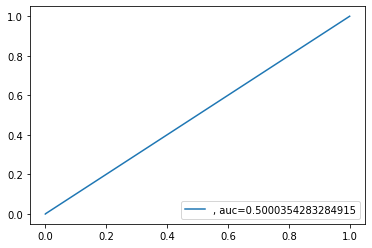

In [75]:
fpr, tpr, _ = roc_curve(y_covtype_test, p_label, pos_label=2.0)

plt.plot(fpr,tpr,label=", auc="+str(auc_raw))
plt.legend(loc=4)
plt.show()

ROC curve for rescaled data

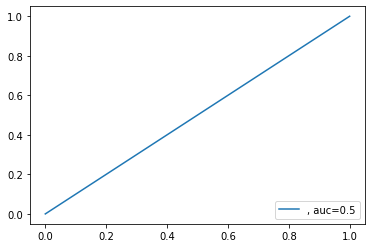

In [76]:
fpr, tpr, _ = roc_curve(y_covtype_test, p_label_rescaled, pos_label=2.0)

plt.plot(fpr,tpr,label=", auc="+str(auc_rescaled))
plt.legend(loc=4)
plt.show()

ROC curve for standardized data.

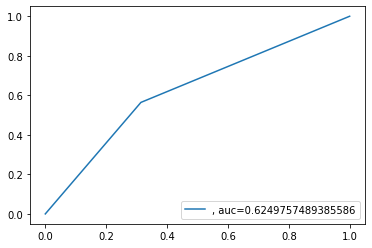

In [77]:
fpr, tpr, _ = roc_curve(y_covtype_test, p_label_standardized, pos_label=2.0)

plt.plot(fpr,tpr,label=", auc="+str(auc_standardized))
plt.legend(loc=4)
plt.show()

ROC curve normalized data.

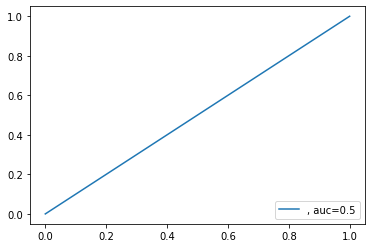

In [78]:
fpr, tpr, _ = roc_curve(y_covtype_test, p_label_normalized, pos_label=2.0)

plt.plot(fpr,tpr,label=", auc="+str(auc_normalized))
plt.legend(loc=4)
plt.show()

#### Part - 4: Discussion of results

It is clear from above results that standardized data preprocessing technique yields better metrics (accuracy, f1-score auc) than other preprocessing techniques and raw data. There could be one or two possible reasons for this result:

1) Dataset follows a Gaussian Distribution.

OR

2) There are too many outlier values in the dataset which is affecting performance for other dataset but standardized dataset remains unaffected by the presence of outliers.